# Heart Disease Analysis.
[Heart Disease data UCI](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Descriptions

1. Age: Age of the patients
2. Sex: Sex of the patient, where 0 represents female and 1 represents male.
3. Cp: Chest pain type.
   - Angina is a type of chest pain that occurs when the heart doesn't blood containing enough oxygen.

Category | ChestPainType
----------|------------
0 | Typical angina
1 | Atypical angina
2 | Non-anginal pain
3 | Asymptomatic

4. Trestbps:  Resting blood pressure in mm Hg on admission to the hospital
5. Chol: Serum cholestoral in mg/dl
6. Fbs: Fasting blood sugar, whether it's greater than 120 mg/dl or not, where 0 represents false and 1 presents true.
7. Restecg: Resting ECG results.
   
Category | Results
--------|-------
 1 | Normal
 2 | Having ST-T wave abnormality
 3 | Showing probable or definite left ventricular hypertrophy by Estes' criteria.

 8. Thalach :Maximum recorded heart rate achieved
 9. Exang: Presence of exercise-induced angina, where 0 represents no and 1
represents yes.
10. Oldpeak: ST depression induced by exercise relative to rest.
11. Slope: The slope of the peak exercise ST segment. The categories are
as follows

Category | Slope
--------|-------
0 | Upsloping
1 | Flat
2 | Downsloping

11. Ca: Number of major vessels colored by fluoroscopy.
12. Thal: Thalassemia (Thalassemia is a hereditary blood disease wherein the body is unable to produce an adequate amount or appropriate form of hemoglobin)
13. Target: Diagnosis of heart disease, where 0 represents where narrowing of the
diameter is less than 50% and 1 represents where narrowing of the diameter is
more than 50%.

### Loading the dataset.

In [5]:
file_path = '../data/heart.csv'

data = pd.read_csv(file_path)

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# total number of columns are 14.
# most of the column name are difficult to understand.
# so we will rename them.

new_column_name = {'cp': 'chest_pain',
'trestbps': 'resting_bp',
'fbs': 'fasting_blood_sugar',
'restecg': 'resting_ecg',
'thalach': 'max_heart_rate',
'exang': 'ex_angina',
'oldpeak': 'st_depression',
'ca': 'colored_vessels',
'thal': 'thalassemia'}

data.rename(index=str, columns=new_column_name, inplace=True)

In [10]:
data.head()

,age,sex,chest_pain,resting_bp,chol,fasting_blood_sugar,resting_ecg,max_heart_rate,ex_angina,st_depression,slope,colored_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   chol                 303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   resting_ecg          303 non-null    int64  
 7   max_heart_rate       303 non-null    int64  
 8   ex_angina            303 non-null    int64  
 9   st_depression        303 non-null    float64
 10  slope                303 non-null    int64  
 11  colored_vessels      303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5+ KB


### Outlier Analysis.

In [20]:
# Outlier detection using boxplot in seaborne.

# seaborn settings
sns.set(
    palette='pastel', # color palette
    
    # rc={'figure.figsize':(11.7,8.27),
    # "axes.titlesize":18,
    # "axes.labelsize":16,
    # "xtick.labelsize":16,
    # "ytick.labelsize":16}
)

D:\anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


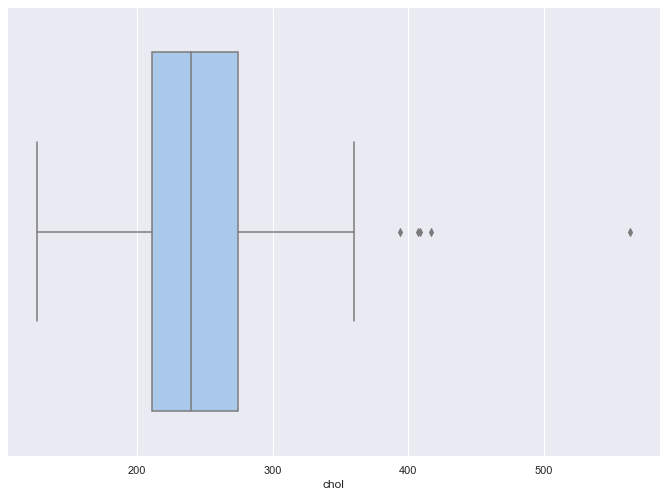

In [22]:
# creating boxplot in Cholesterol column
chol = sns.boxplot(data['chol'])
plt.show()

We can see that there are few outliers in the data beyond the 370.

Now we can check for other columns which may have outliers.
Such columns are: st_depression, colored_vessels, thalassemia.

D:\anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


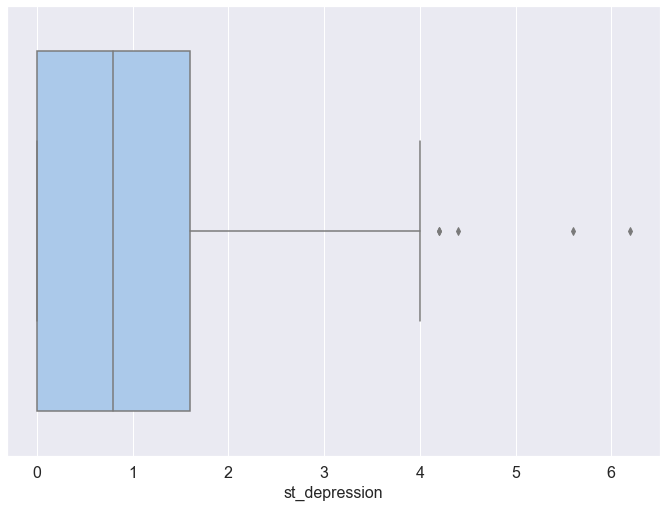

In [17]:
sns.boxplot(data['st_depression'])
plt.show()

D:\anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


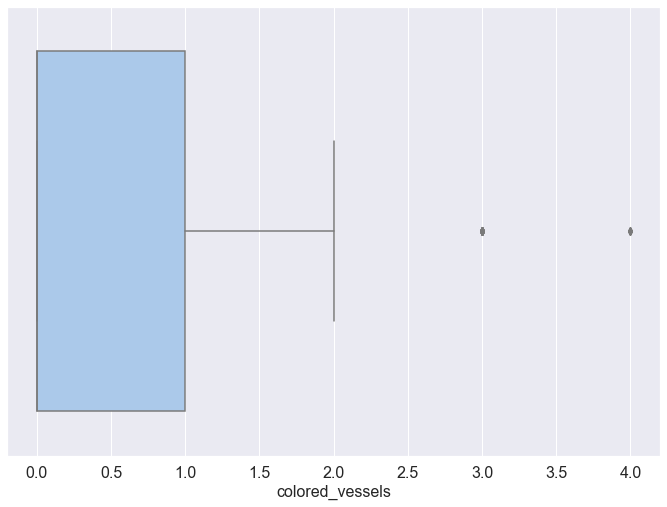

In [18]:
sns.boxplot(data['colored_vessels'])
plt.show()

D:\anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


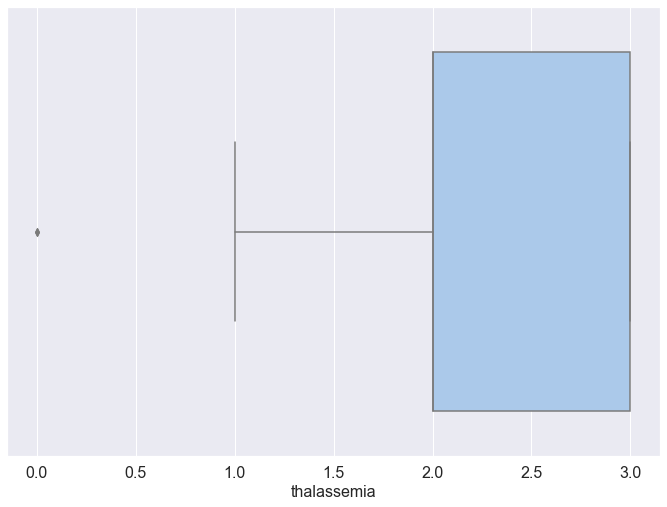

In [19]:
sns.boxplot(data['thalassemia'])
plt.show()

Plotting the distribution and relationship between specific features

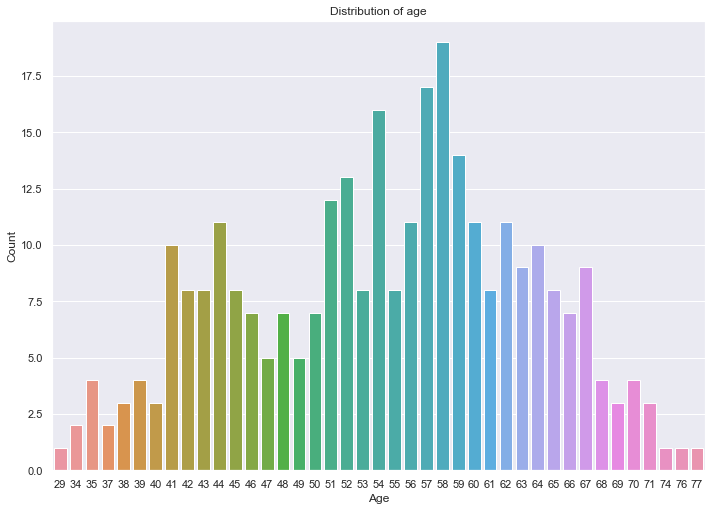

In [25]:
# creating a countplot in for age column
g = sns.countplot(x='age', data=data)
g.set_title("Distribution of age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

- the plot displays the number of patients of each age included in data.
- Youngest patient = 29
- Oldest patient = 77
- the majority of the patient are between (50 to 62) years old.

In [26]:
# using value count of the target columns, we can see how many of the them diagnosed with heart disease.

data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

The above result shows that the dataset are almost balanced. the number of instance of each class is almost equal.

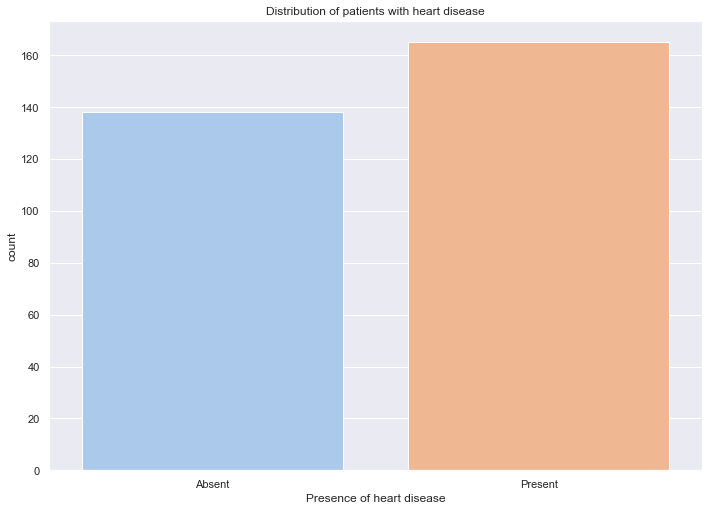

In [31]:
# plot a countplot for the target column

target_count = sns.countplot(x='target', data=data)
target_count.set_title("Distribution of patients with heart disease")
target_count.set_xticklabels(["Absent", "Present"])
plt.xlabel("Presence of heart disease")
plt.show()

From the plotting we can confirm that the number of instances in the both classes are almost equal.

In [32]:
# distribution of sex in disease diagnosis.
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

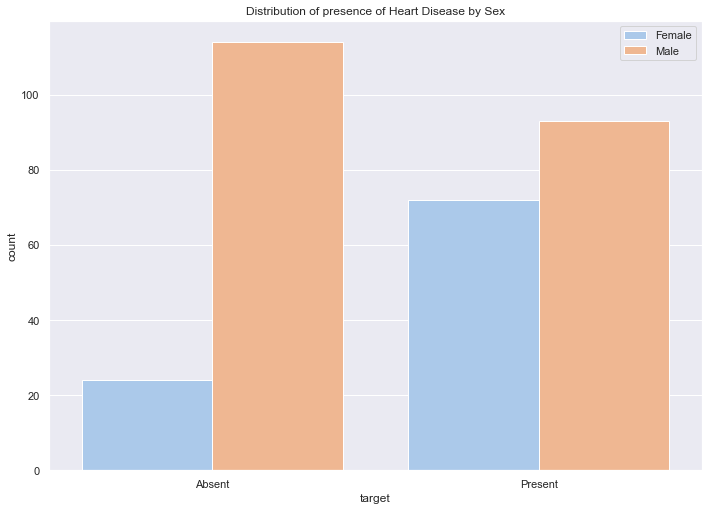

In [33]:
sex_count = sns.countplot(x='target', data=data, hue='sex')
plt.legend(['Female', 'Male'])
sex_count.set_title("Distribution of presence of Heart Disease by Sex")
sex_count.set_xticklabels(['Absent', 'Present'])
plt.show()

Distribution of chest pain type

In [35]:
data.chest_pain.value_counts()

0    143
2     87
1     50
3     23
Name: chest_pain, dtype: int64

It shows that 
Category | ChestpainType | Count
--------|----------------|-------
0| Typical Angina | 143
1| Atypical Angina | 87
2 | Non-anginal pain | 50
3 | Asymptomatic | 23

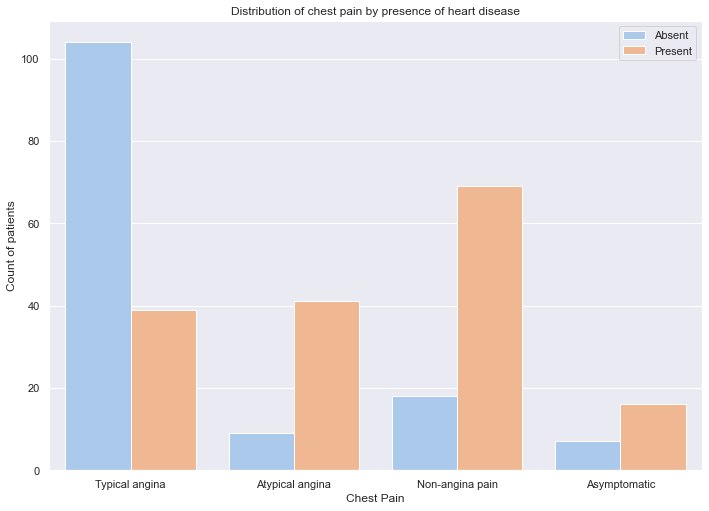

In [38]:
# creating count plot of chest pain

c = sns.countplot(x= 'chest_pain', data=data, hue='target')
c.set_title('Distribution of chest pain by presence of heart disease')
c.set_xticklabels(['Typical angina', 'Atypical angina', 'Non-angina pain', 'Asymptomatic'])
plt.legend(['Absent', 'Present'])
plt.xlabel("Chest Pain")
plt.ylabel("Count of patients")
plt.show()

Colored vessels distribution

In [39]:
data.colored_vessels.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: colored_vessels, dtype: int64

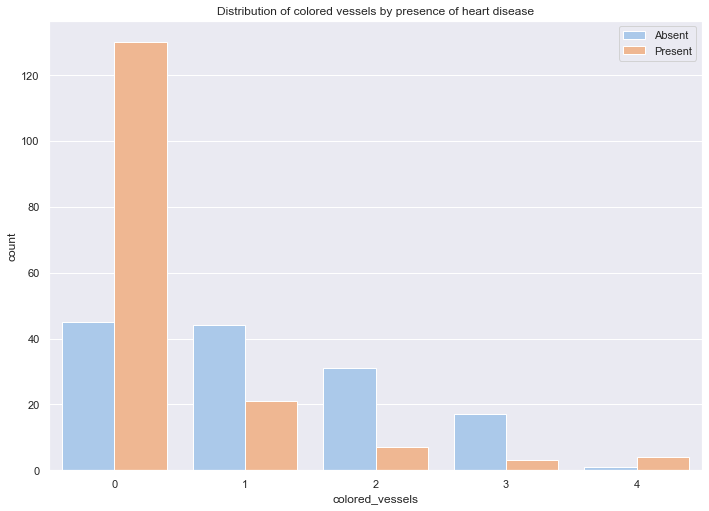

In [40]:
col_ves = sns.countplot(x='colored_vessels', data=data, hue='target')
col_ves.set_title('Distribution of colored vessels by presence of heart disease')
plt.legend(['Absent', 'Present'])
plt.show()

In [41]:
data.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

Category | Slope Type | Count
--------|-----------|--------


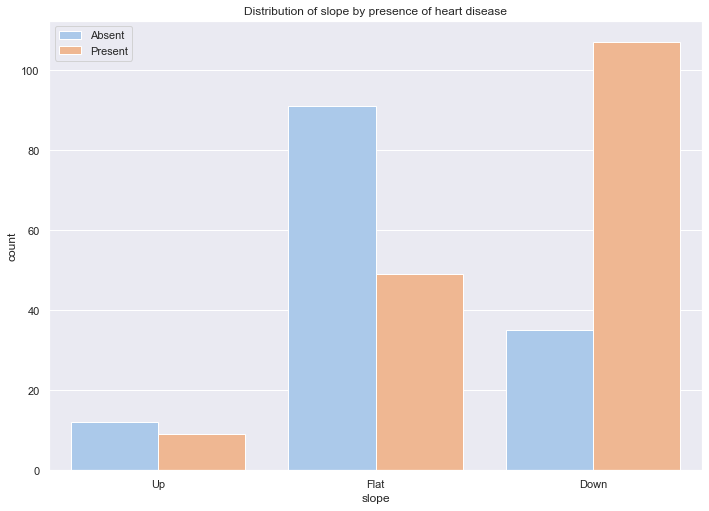

In [43]:
sl = sns.countplot(x='slope', data=data, hue='target')
sl.set_title('Distribution of slope by presence of heart disease')
plt.legend(['Absent', 'Present'])
sl.set_xticklabels(['Up', 'Flat', 'Down'])
plt.show()

In [44]:
# plotting the relationship between the presence of heart disease and maximum recorded heart rate.

sns.set(
    style="whitegrid",
    palette="colorblind",
    )


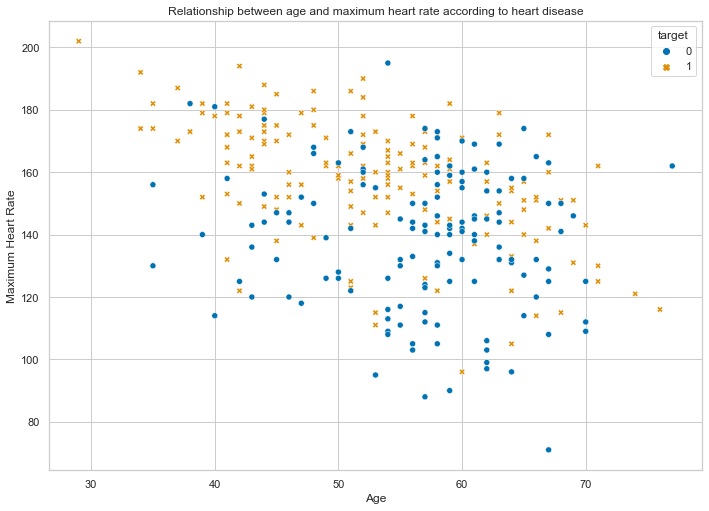

In [48]:
relation = sns.scatterplot(x='age',y='max_heart_rate', data=data, hue='target', style='target')
relation.set_title('Relationship between age and maximum heart rate according to heart disease')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()

In [49]:
# create a new feature named age_category in dataframe.

data['age_category'] = pd.cut(data['age'], bins=list(np.arange(25,85,5)))

Text(0, 0.5, 'Count')

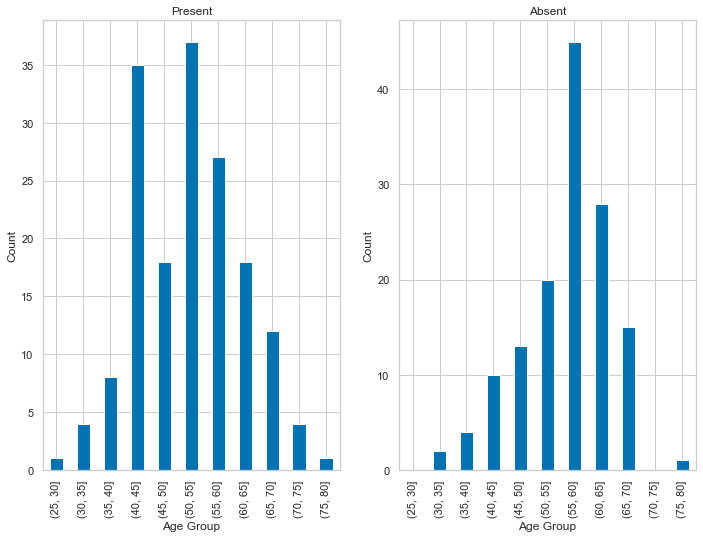

In [52]:
plt.subplot(121)
data[data.target == 1].groupby('age_category')['age'].count().plot(kind='bar')
plt.title('Present')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.subplot(122)
data[data.target == 0].groupby('age_category')['age'].count().plot(kind='bar')
plt.title('Absent')
plt.xlabel('Age Group')
plt.ylabel('Count')

Relationship between the presence of heart disease and cholesteral


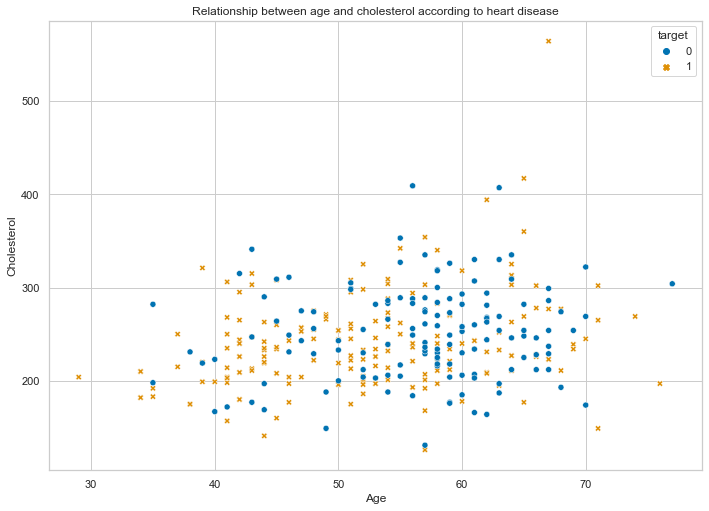

In [53]:
choles = sns.scatterplot(x='age', y='chol', data=data, hue='target', style='target')
choles.set_title('Relationship between age and cholesterol according to heart disease')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

In [54]:
data['chol_category'] = pd.cut(data['chol'], bins=list(np.arange(120,380,20)))

In [57]:
data.head()

,age,sex,chest_pain,resting_bp,chol,fasting_blood_sugar,resting_ecg,max_heart_rate,ex_angina,st_depression,slope,colored_vessels,thalassemia,target,age_category,chol_category
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,"(60, 65]","(220, 240]"
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,"(35, 40]","(240, 260]"
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,"(40, 45]","(200, 220]"
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,"(55, 60]","(220, 240]"
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,"(55, 60]","(340, 360]"


Text(0, 0.5, 'Count')

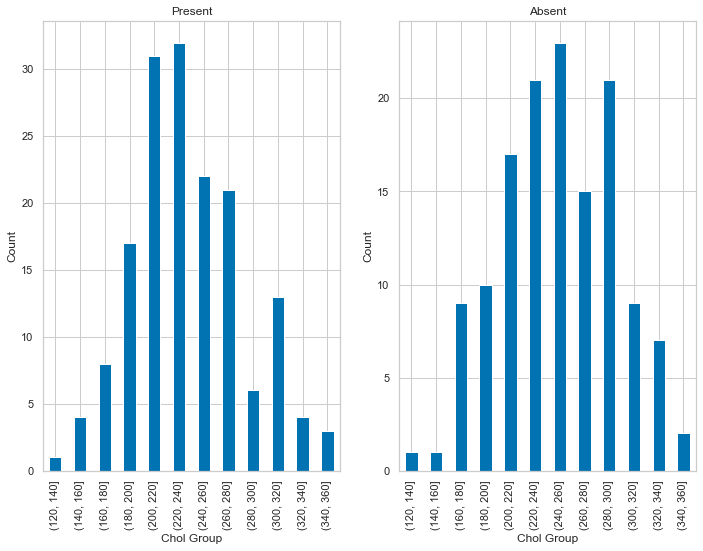

In [58]:
plt.subplot(121)
data[data.target == 1].groupby('chol_category')['chol'].count().plot(kind='bar')
plt.title('Present')
plt.xlabel('Chol Group')
plt.ylabel('Count')

plt.subplot(122)
data[data.target == 0].groupby('chol_category')['chol'].count().plot(kind='bar')
plt.title('Absent')
plt.xlabel('Chol Group')
plt.ylabel('Count')

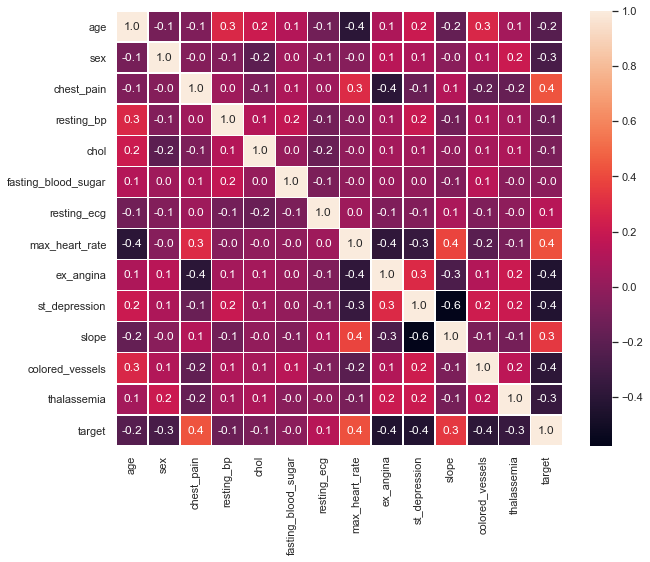

In [59]:
# creating heatmap

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)
plt.show()